In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
# based largely on on http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html

import glob

# guh fine
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def how_text(text):
    if not len(text):
        return -1
    return sum(c.isalpha() for c in text)/len(text)

def how_num(text):
    if not len(text):
        return -1
    return sum(c.isdigit() for c in text)/len(text)

In [3]:
split_emails = []
# split_emails.extend([3,1,1])
for filename in glob.glob('ScottPruittEmails//*.txt'):
    # print(filename)
    emails_file = open(filename)
    emails_text = emails_file.read()
    # split_emails = emails.split('\n\n')
    emails_for_file = emails_text.split('From:')
    # this just puts the from: back
    emails_for_file = list(map(lambda x: 'From:'+x, emails_for_file))
    split_emails.extend(emails_for_file)
len(split_emails)


6003

In [4]:

def line_filter(lines):
    lines = [k for k in lines if how_num(k)< 0.25]        
    lines = [k for k in lines if k.count("@") < 2]
    lines = [k for k in lines if k.count(";") < 2]
    lines = [k for k in lines if k.count(":") < 2]
    lines = [k for k in lines if not k.count("<") and not k.count('>')]        
    lines = [k for k in lines if not k.startswith('Sent')]
    lines = [k for k in lines if not k.startswith('From')]
    lines = [k for k in lines if not k.startswith('To')]
    lines = [k for k in lines if not k.startswith('Reply To')]
    lines = [k for k in lines if not k.startswith('Date')]
    return lines

def strip_stuff(email):
    lines = line_filter( email.split('\n') )
    email = '\n'.join(lines)
    spaces  = sum(c.isspace() for c in email)
    if len(email) and spaces/len(email)>0.3:
        return ''
    else:
        return email

In [5]:
# single_line_filter(split_emails[].split('\n'))

# is this working right?
print('before: ', len(split_emails))
split_emails = [strip_stuff(x) for x in split_emails]

split_emails = [k for k in split_emails if len(k) > 5]
split_emails = [k for k in split_emails if k.count(" ") > 5]

print('after: ', len(split_emails) )

before:  6003
after:  5815


In [29]:
split_emails[27]

'Subject: Meeting \n\nHi Sheila, \n\nI was hoping to set up a meeting with Mr. Whitsitt and General Pruitt here in our office. I am looking at \nFriday, June 21st. Our hopes are to have Leonard Leo and Paul Seby come in as well. If they are not \nable to fly in we will try and make sure they can at the least be on a conference call. The purpose of the \nmeeting is to discuss the Center for Energy Independence. If you could give me a few times that would \nwork on the 21st then I will coordinate with the others. I appreciate your help and look forward to finally \nmeeting you on Friday! \n\nThanks, \n\nAshley \n\nAshley Olmstead \n\nExecutive Assistant \n\nOklahoma Office of Attorney General \n\n\n\nOklahoma City, OK 73105 \n\n\nConfidentiality Warning: This message and any attachments are intended only for the use of the \nintended recipient(s), are confidential, and may be privileged. If you are not the intended recipient, you \nare hereby notified that any review, retransmission, con

In [39]:
# import re
# re.match(r"\b[^\d\W]+\b", split_emails[26])

In [54]:

# default token_pattern=r'(?u)\b\w\w+\b'
# below one ignores numbers 
tfidv = TfidfVectorizer(stop_words='english', token_pattern=r'\b[^\d\W]+\b' )
vectors = tfidv.fit_transform(split_emails)
tfidv.get_feature_names()


['_',
 'aa',
 'aaa',
 'aaainst',
 'aaddisandaaddis',
 'aaed',
 'aaencv',
 'aaenda',
 'aaep',
 'aafdm',
 'aaisselauist',
 'aame',
 'aanderson',
 'aandersoniaalec',
 'aao',
 'aaol',
 'aaron',
 'aaroncooperokc',
 'aav',
 'ab',
 'abamzai',
 'abandon',
 'abandoned',
 'abandons',
 'abbott',
 'abby',
 'abc',
 'abdullah',
 'abi',
 'abiding',
 'abie',
 'abilene',
 'abilities',
 'ability',
 'able',
 'abney',
 'abolishment',
 'abolitionist',
 'abortifacients',
 'abortifaclent',
 'abortion',
 'abostondacific',
 'abound',
 'abounds',
 'abrams',
 'abreast',
 'abridged',
 'abroad',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'abstract',
 'abundantly',
 'abuse',
 'abused',
 'abysmal',
 'ac',
 'aca',
 'academia',
 'academic',
 'academically',
 'academies',
 'academy',
 'accce',
 'accede',
 'accelerate',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessible',
 'accommodate',
 'accompanying',
 'accomplish',
 'accomplished',
 'accomplishes',
 'accomplishments'

In [48]:
# print(repr(vectors))


['00',
 '000',
 '001',
 '002',
 '00356',
 '003880',
 '0072',
 '00774712',
 '00777802',
 '00780934',
 '00782508',
 '007825081',
 '00782545',
 '007825451',
 '009',
 '00am',
 '00pm',
 '01',
 '01082015',
 '012',
 '0130',
 '015',
 '0161',
 '01mstead',
 '01msteadioag',
 '02',
 '027',
 '03',
 '030',
 '036',
 '04',
 '048',
 '0480',
 '0493',
 '05',
 '051613',
 '054',
 '059',
 '06',
 '0699',
 '07',
 '07061',
 '072413',
 '075',
 '075420',
 '078',
 '08',
 '08142013',
 '08493',
 '09',
 '0900',
 '0901',
 '0934',
 '0ag',
 '0ag_n0tes',
 '0am',
 '0cpa',
 '0i',
 '0ittefi',
 '0k',
 '0klahoma',
 '0lakkensm',
 '0mb',
 '0rder',
 '10',
 '100',
 '1000',
 '1001',
 '100782820',
 '100m',
 '100mbps',
 '101',
 '10112013',
 '10122',
 '101st',
 '102',
 '103',
 '1030632',
 '104',
 '105',
 '1050',
 '106',
 '1062',
 '109552',
 '10a',
 '10am',
 '10th',
 '11',
 '110',
 '1100',
 '1101',
 '1110',
 '114',
 '1146',
 '117',
 '11a',
 '11am',
 '11e',
 '11th',
 '12',
 '120',
 '1200',
 '121',
 '122',
 '123',
 '1233',
 '1248',
 '1

In [55]:
# X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)
X_reduced = TruncatedSVD(n_components=100, random_state=42).fit_transform(vectors)

In [65]:

# X_embedded = TSNE(n_components=, perplexity=40, verbose=2).fit_transform(X_reduced)
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5815
[t-SNE] Computed conditional probabilities for sample 2000 / 5815
[t-SNE] Computed conditional probabilities for sample 3000 / 5815
[t-SNE] Computed conditional probabilities for sample 4000 / 5815
[t-SNE] Computed conditional probabilities for sample 5000 / 5815
[t-SNE] Computed conditional probabilities for sample 5815 / 5815
[t-SNE] Mean sigma: 0.110876
[t-SNE] Iteration 25: error = 1.6245443, gradient norm = 0.0115569
[t-SNE] Iteration 50: error = 1.5695612, gradient norm = 0.0073715
[t-SNE] Iteration 75: error = 1.3023694, gradient norm = 0.0027095
[t-SNE] Iteration 100: error = 1.2383543, gradient norm = 0.0023228
[t-SNE] Error after 100 iterations with early exaggeration: 1.238354
[t-SNE] Iteration 125: error = 1.1225786, gradient norm = 0.0019528
[t-SNE] Iteration 150: error = 1.0839863, gradient norm = 0.0017878
[t-SNE] Iteration 

In [66]:
X_embedded_as_list = X_embedded.tolist()
X_embedded[0]


array([ 7.25609671,  7.37620855])

In [67]:
# wrap_at = 60 #30
# from textwrap import wrap
# def add_breaks(t):
#     return "\n".join(wrap(t, wrap_at))


# split_emails_with_breaks = [add_breaks(e) for e in split_emails]



In [68]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 15, 15

cmap=plt.get_cmap('viridis')

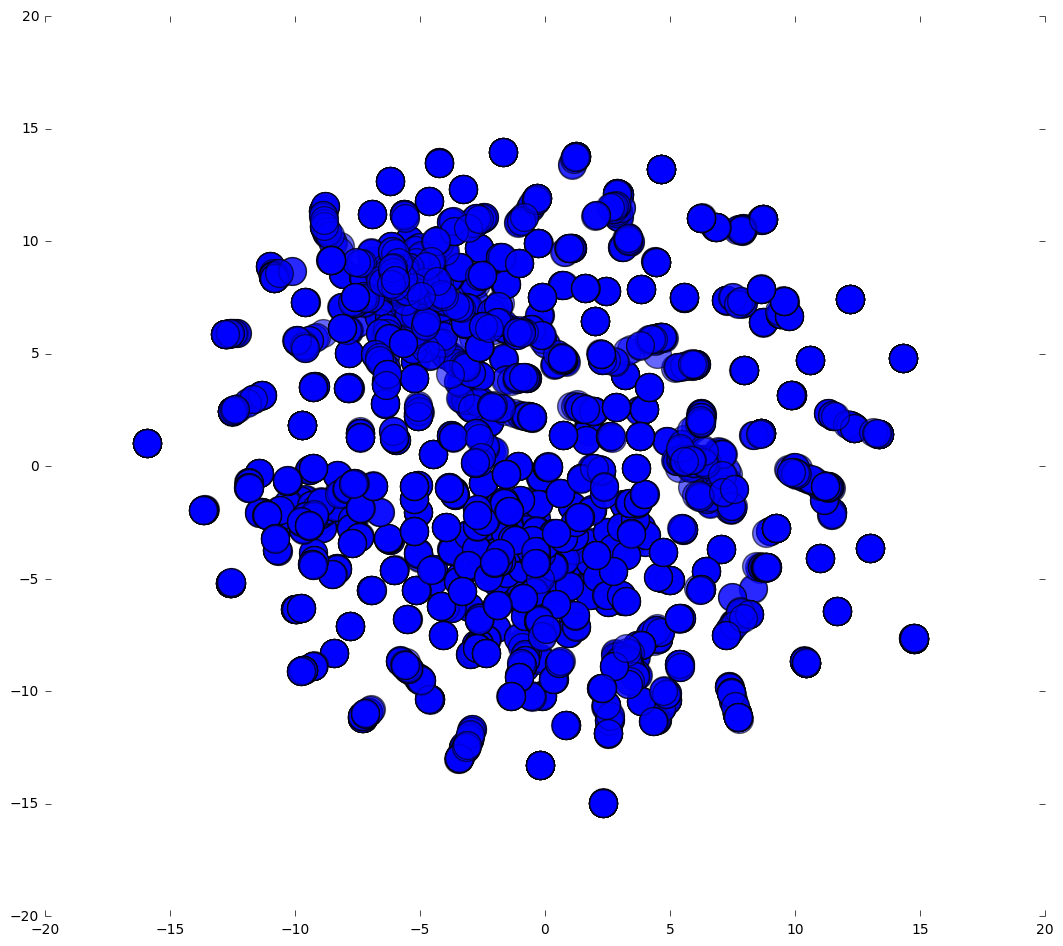

In [69]:
fig = figure(figsize=(10, 10))
# fig = figure(figsize=(100, 100))
# fig = figure(figsize=(20, 20))

ax = axes(frameon=False)
# setp(ax, xticks=(), yticks=())

subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1], s=400, alpha=0.6)
# scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_embedded[:, 2], s=400, alpha=0.6)


# scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_embedded[:, 2], s=5000, alpha=0.01, lw=0)

# plt.axis([-10, 10, -10, 10])

# for text version!
# for i, txt in enumerate(split_emails_with_breaks):
#     ax.annotate(txt, (X_embedded[i][0], X_embedded[i][1]), size=6, wrap=True, ha="center", va="center", alpha=0.9,)
#     bbox={'facecolor': 'white', 'alpha': 0.01}).set_zorder(0)
    
#                 bbox={'alpha': 0.2, 'boxstyle':'round' })
#                 bbox={'facecolor':X_embedded[i][2], 'pad':1, 'alpha': 0.2, 'boxstyle':'round' })

# Audio(url=sound_file, autoplay=True)

In [70]:
data = {"X_embedded":X_embedded_as_list, "split_emails":split_emails}
import json
with open('email_plot_data_2.json', 'w') as fp:
    json.dump(data, fp)